# 회귀 - 캘리포니아 하우징

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [3]:
df = pd.DataFrame(house.data, columns=house.feature_names)
df['target'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.shape

(20640, 9)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, test_size=0.2, random_state=seed
)

- 회귀모델 정의/설정/학습/평가

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential([
    Dense(20, input_dim=8, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1)                                    # 회귀에서는 출력층에 활성화함수를 사용하지 않음
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 126       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='rmsprop', loss='mean_squared_error')        # 회귀에서는 metrics 사용하지 않음

In [29]:
hist = model.fit(X_train, y_train, validation_split=0.1,
                            epochs=100, batch_size=256)

Train on 14860 samples, validate on 1652 samples
Epoch 1/100
14860/14860 [==============================] - 1s 46us/sample - loss: 22895.1452 - val_loss: 302.2048
Epoch 2/100
14860/14860 [==============================] - 0s 8us/sample - loss: 95.9567 - val_loss: 59.1271
Epoch 3/100
14860/14860 [==============================] - 0s 16us/sample - loss: 18.8789 - val_loss: 6.7924
Epoch 4/100
14860/14860 [==============================] - 0s 12us/sample - loss: 16.5403 - val_loss: 5.6200
Epoch 5/100
14860/14860 [==============================] - 0s 8us/sample - loss: 12.4770 - val_loss: 3.4467
Epoch 6/100
14860/14860 [==============================] - 0s 7us/sample - loss: 11.8311 - val_loss: 15.0861
Epoch 7/100
14860/14860 [==============================] - 0s 8us/sample - loss: 12.2467 - val_loss: 34.3953
Epoch 8/100
14860/14860 [==============================] - 0s 8us/sample - loss: 10.8459 - val_loss: 22.9160
Epoch 9/100
14860/14860 [==============================] - 0s 7us/sample - 

- 학습과정 시각화

In [30]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

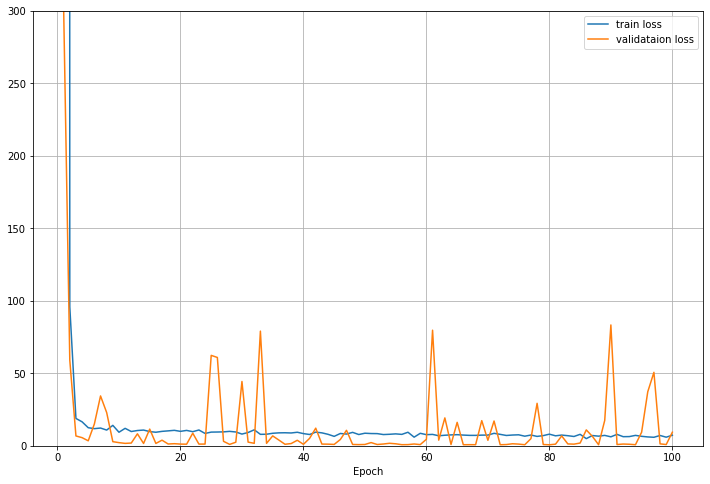

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validataion loss')
plt.legend(), plt.grid(), plt.ylim(0, 300)
plt.xlabel('Epoch')
plt.show()

- 평가

In [34]:
pred = model.predict(X_test)

In [35]:
dft = pd.DataFrame({'y_test': y_test, 'pred': pred.flatten()})
dft.head()

,y_test,pred
0,4.771,8.111302
1,1.371,4.172201
2,1.233,7.767546
3,0.938,4.200616
4,3.260,4.694179


In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, pred), r2_score(y_test, pred)

(9.047708281640423, -5.991565750003127)